<a href="https://colab.research.google.com/github/ackw/fika/blob/main/rtx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://drive.google.com/file/d/0BxYys69jI14kYVM3aVhKS1VhRUk/view?usp=share_link&resourcekey=0-dabpv_3J0C0cditpiAfhAw
# !tar -xf UTKFace.tar.gz

In [ ]:
!gdown --id 0BxYys69jI14kYVM3aVhKS1VhRUk

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=0BxYys69jI14kYVM3aVhKS1VhRUk
To: /content/UTKFace.tar.gz
100% 107M/107M [00:05<00:00, 20.4MB/s] 


In [ ]:
!tar -xf UTKFace.tar.gz

In [ ]:
# import streamlit as st
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

data_dir = '/content/UTKFace'
files = os.listdir(data_dir)
images = []
ages = []
genders = []
races = []
for file in files:
    if file.endswith('.jpg'):
        image_path = os.path.join(data_dir, file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
        
        # Get age, gender, and race labels from filename
        filename = os.path.splitext(file)[0]  # Remove .jpg extension
        filename_parts = filename.split('.')
        label_parts = filename_parts[0].split('_')
        age = int(label_parts[0])
        gender = int(label_parts[1])
        race = int(label_parts[2]) if len(label_parts) == 3 else 0
        ages.append(age)
        genders.append(gender)
        races.append(race)

X = np.array(images)
y_age = np.array(ages)
y_gender = np.array(genders)
y_race = np.array(races)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_age, y_test_age, y_train_gender, y_test_gender, y_train_race, y_test_race = train_test_split(X, y_age, y_gender, y_race, test_size=0.4, random_state=42)

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
input_layer = Input(shape=(200, 200, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)



age_output = Dense(101, name='age_output')(x)
gender_output = Dense(2, activation='softmax', name='gender_output')(x)
race_output = Dense(5, activation='softmax', name='race_output')(x)

model = Model(inputs=input_layer, outputs=[age_output, gender_output, race_output])

# Step 4: Compile the model
model.compile(loss={'age_output': 'mean_absolute_error', 
                     'gender_output': 'binary_crossentropy', 
                     'race_output': 'categorical_crossentropy'},
               optimizer='adam',
               metrics={'age_output': 'mae', 'gender_output': 'accuracy', 'race_output': 'accuracy'})


In [ ]:
model.fit(X_train, [y_train_age, y_train_gender, y_train_race], validation_data=(X_test, [y_test_age, y_test_gender, y_test_race]), epochs=10, batch_size=32)


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

input_shape = (200, 200, 3)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = Flatten()(x)

age_output = Dense(101, activation='softmax', name='age_output')(x)
gender_output = Dense(2, activation='softmax', name='gender_output')(x)
race_output = Dense(5, activation='softmax', name='race_output')(x)

model = Model(inputs=base_model.input, outputs=[age_output, gender_output, race_output])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, [y_train_age, y_train_gender, y_train_race], validation_data=(X_test, [y_test_age, y_test_gender, y_test_race]), epochs=10, batch_size=32)

archive

In [ ]:
import os

# Set the directory where your files are located
directory = '/content/UTKFace'

# Get a list of all the files in the directory
files = os.listdir(directory)

# Define a function to filter filenames with less than 3 underscores
def filter_func(filename):
    return filename.count('_') >= 3

# Use a list comprehension to get the filenames that pass the filter
filenames_to_keep = [filename for filename in files if filter_func(filename)]

# Delete the files that do not pass the filter
for filename in files:
    if not filter_func(filename):
        os.remove(os.path.join(directory, filename))

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Define the path to the UTKFace directory
utkface_dir = 'UTKFace'

# Define a function to extract the age, gender, and glasses labels from the filename
def extract_labels(filename):
    parts = filename.split('_')
    age = int(parts[0])
    gender = int(parts[1])
    race = int(parts[2])

    # race = 5 if parts[2] == '0.jpg' else int(parts[2])
    return age, gender, race


# Create a list to store the image data and labels
images = []
ages = []
genders = []
races = []

# Loop through each file in the UTKFace directory
for filename in os.listdir(utkface_dir):
    if not filename.endswith('.jpg.chip.jpg'):
        continue
        
    # Read the image file
    image_path = os.path.join(utkface_dir, filename)
    image = cv2.imread(image_path)
    
    # Extract the age, gender, and glasses labels from the filename
    age, gender,race = extract_labels(filename)
    
    # Append the image data and labels to the lists
    images.append(image)
    ages.append(age)
    genders.append(gender)
    races.append(race)


    
# Convert the lists to NumPy arrays
images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)
races = np.array(races)


# Define a dictionary to store the labels
label_dict = {
    'filename': os.listdir(utkface_dir),
    'age': ages,
    'gender': genders,
    'race': races
}

# Create a DataFrame from the dictionary and save it to a CSV file
labels_df = pd.DataFrame(label_dict)
labels_df.to_csv('labels.csv', index=False) 

ValueError: ignored

In [ ]:
contain_values = df[df['filename'].str.contains('20170109142408075.jpg.chip.jpg')]
print (contain_values)

                                 filename  age  gender
8562  61_1_20170109142408075.jpg.chip.jpg   61       1


In [ ]:
contain_values = df[df['filename'].str.contains('20170109150557335.jpg.chip.jpg')]
print (contain_values)

                                  filename  age  gender
17656  61_1_20170109150557335.jpg.chip.jpg   61       1


In [ ]:
contain_values = df[df['filename'].str.contains('20170109150557335.jpg.chip.jpg')]

20170116174525125.jpg.chip.jpg

In [ ]:
# [age] is an integer from 0 to 116, indicating the age
# [gender] is either 0 (male) or 1 (female)
# [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).

In [ ]:
!rm /content/UTKFace/61_1_20170109142408075.jpg.chip.jpg

In [ ]:
!rm /content/UTKFace/61_1_20170109150557335.jpg.chip.jpg

In [ ]:
import pandas as pd

df = pd.read_csv('/content/labels.csv')
df.head()

,filename,age,gender
0,53_0_3_20170119164025958.jpg.chip.jpg,53,0
1,9_1_4_20170103200637399.jpg.chip.jpg,9,1
2,35_1_2_20170116233432190.jpg.chip.jpg,35,1
3,65_0_3_20170117190407347.jpg.chip.jpg,65,0
4,43_0_0_20170117142951181.jpg.chip.jpg,43,0


In [ ]:
len(df['filename'])

AttributeError: ignored

In [ ]:
df.describe()

,age,gender,glasses
count,23708.000000,23708.000000,23708.0
mean,33.303484,0.477349,1.0
std,19.886112,0.499497,0.0
min,1.000000,0.000000,1.0
25%,23.000000,0.000000,1.0
50%,29.000000,0.000000,1.0
75%,45.000000,1.000000,1.0
max,116.000000,1.000000,1.0


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset and the labels CSV file
dataset_path = '/content/UTKFace/'
csv_file = '/content/labels.csv'

# Load the labels from the CSV file, skipping the first row
df = pd.read_csv(csv_file, header=None, skiprows=1, names=['filename', 'age', 'gender', 'glasses'])
age_labels = to_categorical(df['age'], num_classes=4)
gender_labels = to_categorical(df['gender'], num_classes=2)
race_labels = to_categorical(df['glasses'], num_classes=5)

# Initialize the lists to store the data and labels
data = []
labels = []

# Loop over all the files in the dataset folder
for filename in os.listdir(dataset_path):
    # Load the image data
    image = cv2.imread(os.path.join(dataset_path, filename))

    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    # Extract the age, gender, and race labels from the filename
    parts = filename.split('_')
    age = int(parts[0])
    gender = int(parts[1])
    race = int(parts[2])

    # Append the image data and labels to the lists
    data.append(image)
    labels.append([age_labels[age], gender_labels[gender], race_labels[race]])

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Save the preprocessed data and labels to disk
np.save('/content/preprocessed_data.npy', data)
np.save('/content/preprocessed_labels.npy', labels)


IndexError: ignored

In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

dataset_folder_name = '/content/UTKFace'

dataset_dict = {
    'ethnicity_id': {
        0: 'white', 
        1: 'black', 
        2: 'asian', 
        3: 'indian', 
        4: 'others'
    },
    'gender_id': {
        0: 'male',
        1: 'female'
    }
}

dataset_dict['gender_alias'] = dict((g, i) for i, g in dataset_dict['gender_id'].items())
dataset_dict['ethnicity_alias'] = dict((r, i) for i, r in dataset_dict['ethnicity_id'].items())

In [ ]:
dataset_dict

{'ethnicity_id': {0: 'white',
  1: 'black',
  2: 'asian',
  3: 'indian',
  4: 'others'},
 'gender_id': {0: 'male', 1: 'female'},
 'gender_alias': {'male': 0, 'female': 1},
 'ethnicity_alias': {'white': 0,
  'black': 1,
  'asian': 2,
  'indian': 3,
  'others': 4}}

In [ ]:
def parse_info_from_file(path):
        try:
            filename = os.path.split(path)[1]
            filename = os.path.splitext(filename)[0]
            age, gender, race, _ = filename.split('_')            
            return int(age), dataset_dict['gender_id'][int(gender)], dataset_dict['ethnicity_id'][int(race)]
        except Exception as ex:
            return None, None, None
        
def parse_dataset(dataset_path, ext='jpg'):     
    files = glob.glob(os.path.join(dataset_path, "*.%s" % ext))
    
    records = []
    for file in files:
        info = parse_info_from_file(file)
        records.append(info)
        
    df = pd.DataFrame(records)
    df['file_path'] = files
    df.columns = ['age', 'gender', 'ethnicity', 'file_path']
    df = df.dropna()
    
    return df

In [ ]:
df = parse_dataset(dataset_folder_name)
df['file_name'] = ''
df['file_name'] = df.apply(lambda x : x['file_path'].split('/')[-1], axis = 1)
df.head()

,age,gender,ethnicity,file_path,file_name
0,1.0,male,white,/content/UTKFace/1_0_0_20170110213012671.jpg.c...,1_0_0_20170110213012671.jpg.chip.jpg
1,35.0,male,black,/content/UTKFace/35_0_1_20170113155255651.jpg....,35_0_1_20170113155255651.jpg.chip.jpg
2,24.0,male,white,/content/UTKFace/24_0_0_20170104230108767.jpg....,24_0_0_20170104230108767.jpg.chip.jpg
3,55.0,male,indian,/content/UTKFace/55_0_3_20170119204811925.jpg....,55_0_3_20170119204811925.jpg.chip.jpg
4,27.0,male,black,/content/UTKFace/27_0_1_20170117014026944.jpg....,27_0_1_20170117014026944.jpg.chip.jpg


Text(0, 0.5, 'count')

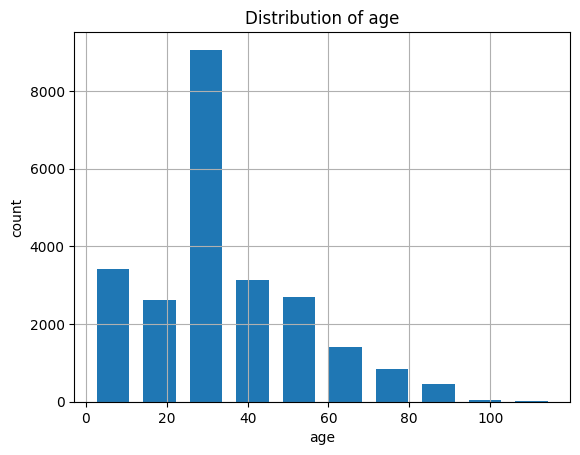

In [ ]:
df['age'].hist(rwidth=0.7)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

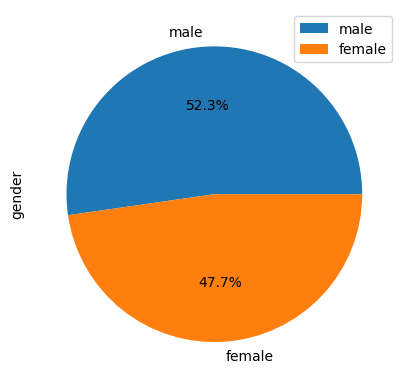

In [ ]:
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

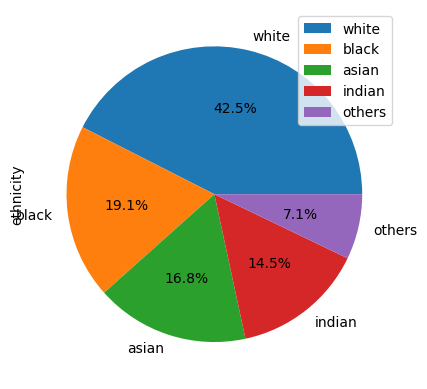

In [ ]:
df['ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", labels=['white', 'black', 'asian', 'indian', 'others'])
plt.legend()

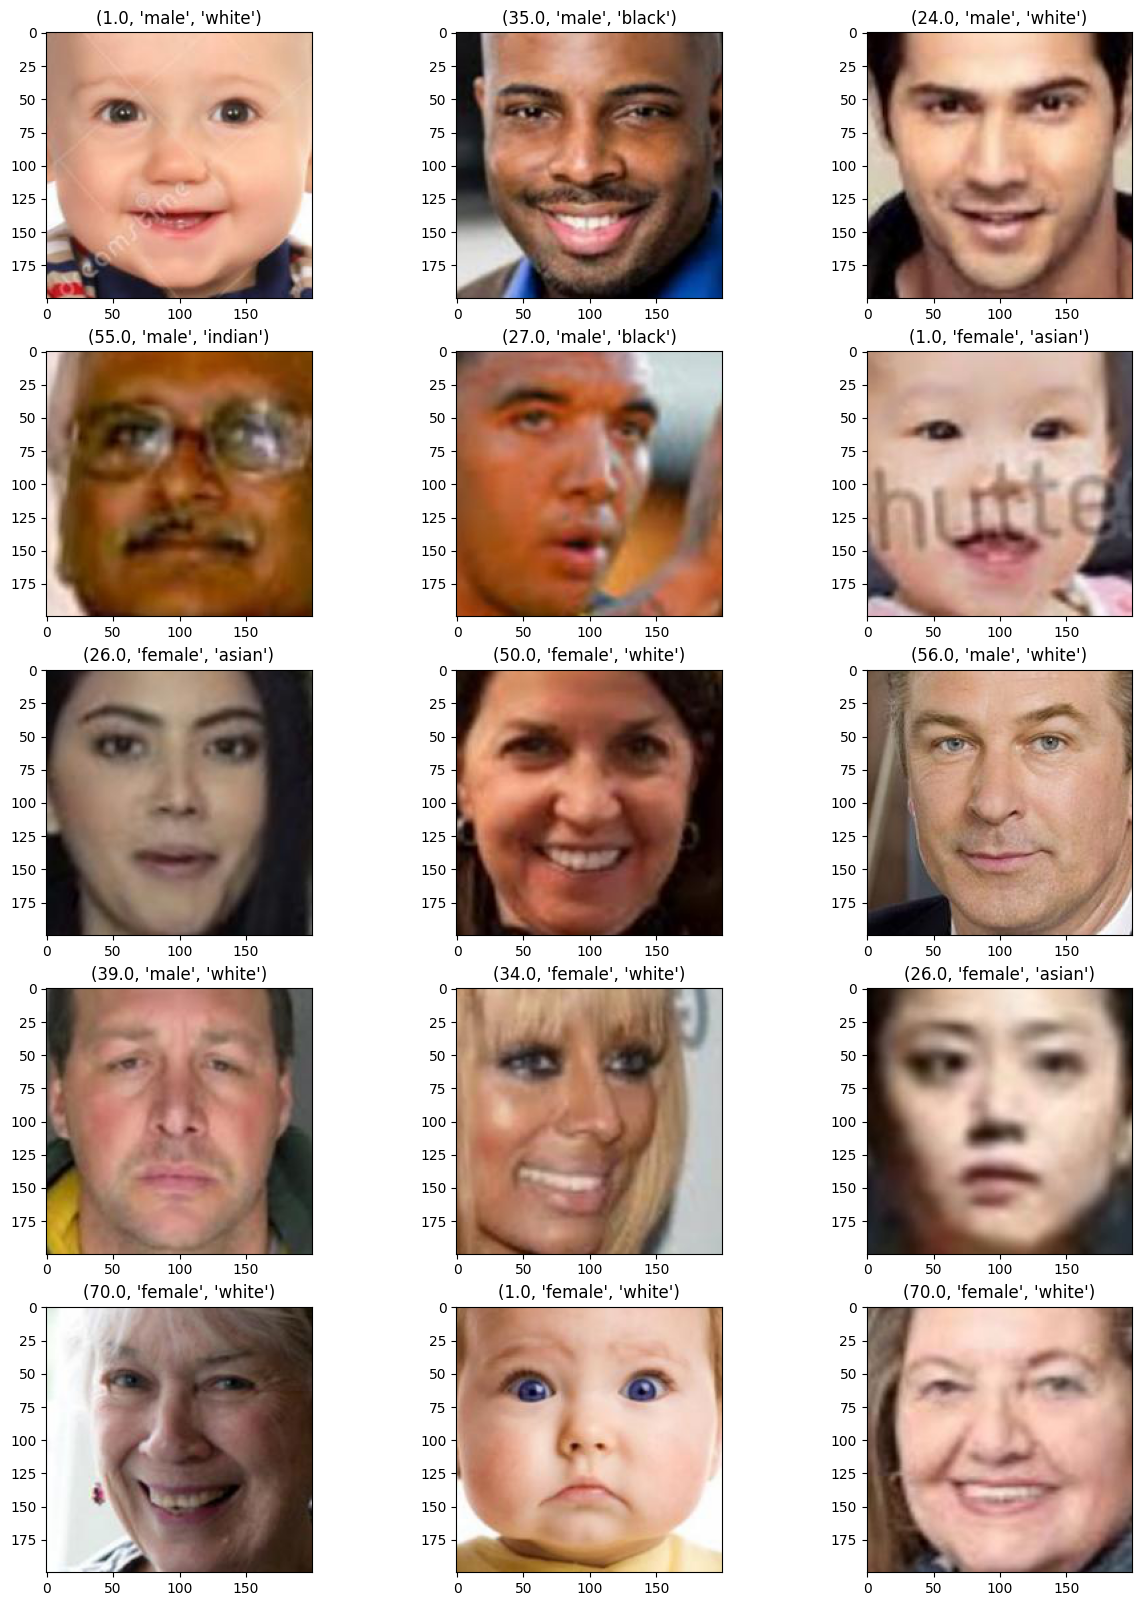

In [ ]:
plt.figure(figsize=(15,20))

for i in range(15):
    plt.subplot(5,3,i+1)
    file = df['file_path'][i]
    image = imread(file)
    plt.imshow(image)
    plt.title((df['age'][i], df['gender'][i], df['ethnicity'][i]))

In [ ]:
df['gender'] = df.apply(lambda x : dataset_dict['gender_alias'][x['gender']], axis = 1)
df['ethnicity'] = df.apply(lambda x : dataset_dict['ethnicity_alias'][x['ethnicity']], axis = 1)
df.head()

,age,gender,ethnicity,file_path,file_name
0,1.0,0,0,/content/UTKFace/1_0_0_20170110213012671.jpg.c...,1_0_0_20170110213012671.jpg.chip.jpg
1,35.0,0,1,/content/UTKFace/35_0_1_20170113155255651.jpg....,35_0_1_20170113155255651.jpg.chip.jpg
2,24.0,0,0,/content/UTKFace/24_0_0_20170104230108767.jpg....,24_0_0_20170104230108767.jpg.chip.jpg
3,55.0,0,3,/content/UTKFace/55_0_3_20170119204811925.jpg....,55_0_3_20170119204811925.jpg.chip.jpg
4,27.0,0,1,/content/UTKFace/27_0_1_20170117014026944.jpg....,27_0_1_20170117014026944.jpg.chip.jpg


In [ ]:
df = df.astype({'age': int, 'gender': int, 'ethnicity': int, 'file_path': str, 'file_name': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23705 entries, 0 to 23707
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   gender     23705 non-null  int64 
 2   ethnicity  23705 non-null  int64 
 3   file_path  23705 non-null  object
 4   file_name  23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [ ]:
SPLIT = 0.2

from sklearn.model_selection import train_test_split

training_data, validation_data = train_test_split(df, test_size=SPLIT)

n_train = len(training_data)
n_val = len(validation_data)

print('No. of training image:', n_train)
print('No. of validation image:', n_val)

No. of training image: 18964
No. of validation image: 4741


In [ ]:
HEIGHT = WIDTH = 128

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 64

train_generator = train_datagen.flow_from_dataframe(training_data, 
                                                    directory=dataset_folder_name, 
                                                    x_col = 'file_name', 
                                                    y_col = ['age', 'gender', 'ethnicity'], 
                                                    target_size = (HEIGHT, WIDTH),
                                                    class_mode = 'multi_output',
                                                    batch_size = BATCH_SIZE,
                                                    seed = 37)

val_generator = val_datagen.flow_from_dataframe(validation_data, 
                                                directory=dataset_folder_name, 
                                                x_col = 'file_name', 
                                                y_col = ['age', 'gender', 'ethnicity'], 
                                                target_size = (HEIGHT, WIDTH),
                                                class_mode = 'multi_output',
                                                batch_size = BATCH_SIZE,
                                                seed = 37)

Found 18964 validated image filenames.
Found 4741 validated image filenames.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
import tensorflow as tf

class MTL_UTK():
    def make_default_hidden_layers(self, inputs):
        x = Conv2D(16, (3, 3), padding="same")(inputs)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(3, 3))(x)
        x = Dropout(0.25)(x)        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)        
        x = Conv2D(32, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=-1)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Dropout(0.25)(x)        
        return x  
    
    def build_ethnicity_branch(self, inputs, num_ethnicities):
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_ethnicities)(x)
        x = Activation("softmax", name="ethnicity_output")(x)        
        return x  
    
    def build_gender_branch(self, inputs, num_genders=1): 
        x = Lambda(lambda c: tf.image.rgb_to_grayscale(c))(inputs)       
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(num_genders)(x)
        x = Activation("sigmoid", name="gender_output")(x)        
        return x  
    
    def build_age_branch(self, inputs):            
        x = self.make_default_hidden_layers(inputs)        
        x = Flatten()(x)
        x = Dense(128)(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        x = Dense(1)(x)
        x = Activation("linear", name="age_output")(x)        
        return x 
    
    def assemble_full_model(self, height, width, num_ethnicities):       
        input_shape = (height, width, 3)        
        inputs = Input(shape=input_shape)        
        age_branch = self.build_age_branch(inputs)
        gender_branch = self.build_gender_branch(inputs)
        ethnicity_branch = self.build_ethnicity_branch(inputs, num_ethnicities)        
        model = Model(inputs=inputs,
                     outputs = [age_branch, gender_branch, ethnicity_branch],
                     name="face_net")        
        return model

Model: "face_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                          

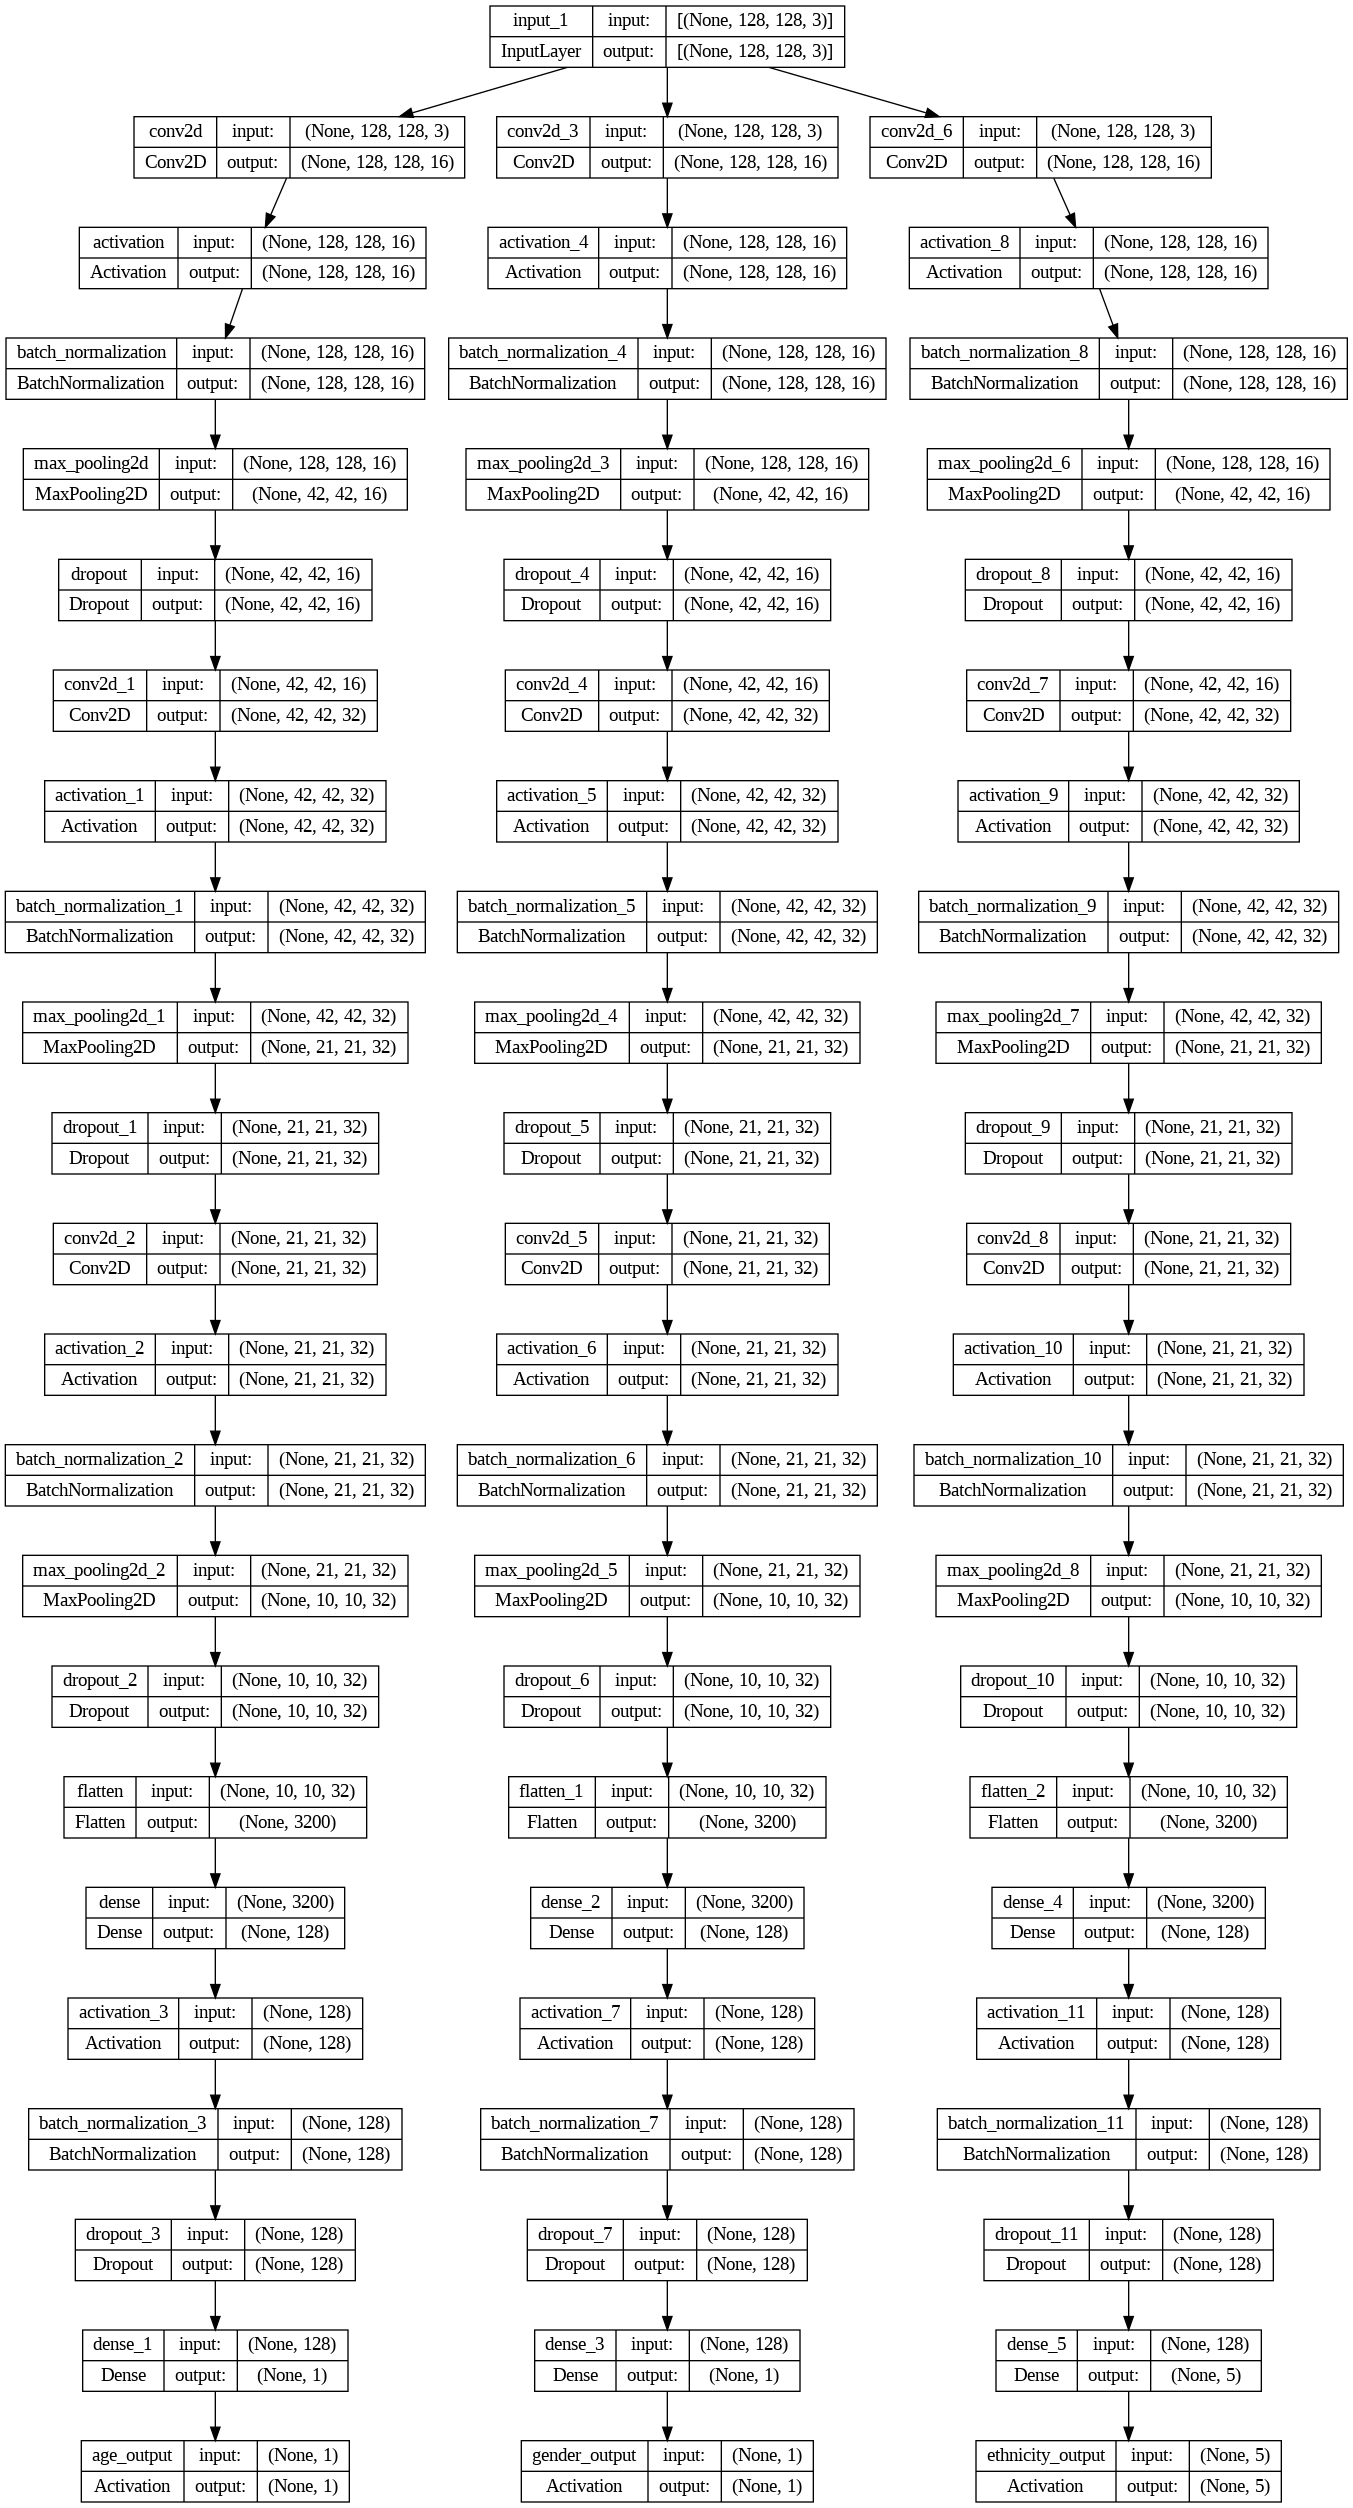

In [ ]:
model = MTL_UTK().assemble_full_model(HEIGHT, WIDTH, num_ethnicities=len(dataset_dict['ethnicity_alias']))

model.summary()

from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
init_lr = 1e-4
epochs = 50

In [ ]:
from tensorflow.keras.optimizers import Adam


opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, 
              loss={
                  'age_output': 'mse',
                  'gender_output': 'binary_crossentropy',
                  'ethnicity_output': 'sparse_categorical_crossentropy'},
              
              loss_weights={
                  'age_output': 4., 
                  'gender_output': 0.1,
                  'ethnicity_output': 1.5},
              
              metrics={
                  'age_output': 'mae', 
                  'gender_output': 'accuracy',
                  'ethnicity_output': 'accuracy'})

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# earlystopping = EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 5, 
#                                         restore_best_weights = True)

checkpoint = ModelCheckpoint("Best_model_params.h5", monitor='val_loss')

# callbacks = [checkpoint, earlystopping]
callbacks = [checkpoint]

history = model.fit(train_generator,
                    steps_per_epoch = n_train // BATCH_SIZE, 
                    epochs=epochs,
                    batch_size = BATCH_SIZE,
                    validation_data=val_generator,
                    validation_steps = n_val // BATCH_SIZE,
                    callbacks = callbacks)

Epoch 1/50
296/296 [==============================] - 80s 195ms/step - loss: 1412.2307 - age_output_loss: 352.6339 - gender_output_loss: 0.4927 - ethnicity_output_loss: 1.0967 - age_output_mae: 13.8368 - gender_output_accuracy: 0.7649 - ethnicity_output_accuracy: 0.5985 - val_loss: 1232.3433 - val_age_output_loss: 307.6982 - val_gender_output_loss: 0.3777 - val_ethnicity_output_loss: 1.0085 - val_age_output_mae: 13.8041 - val_gender_output_accuracy: 0.8228 - val_ethnicity_output_accuracy: 0.6292
Epoch 2/50
296/296 [==============================] - 39s 132ms/step - loss: 687.5378 - age_output_loss: 171.5589 - gender_output_loss: 0.3588 - ethnicity_output_loss: 0.8445 - age_output_mae: 9.9633 - gender_output_accuracy: 0.8424 - ethnicity_output_accuracy: 0.7007 - val_loss: 3054.7148 - val_age_output_loss: 763.3187 - val_gender_output_loss: 0.3454 - val_ethnicity_output_loss: 0.9368 - val_age_output_mae: 23.7806 - val_gender_output_accuracy: 0.8471 - val_ethnicity_output_accuracy: 0.6850


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=1)

fig.add_subplot(4,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,3)
plt.plot(history.history['age_output_loss'], label='train loss')
plt.plot(history.history['val_age_output_loss'], label='val loss')
plt.title('Age Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,4)
plt.plot(history.history['age_output_mae'], label='train mae')
plt.plot(history.history['val_age_output_mae'], label='val mae')
plt.title('Age MAE')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,5)
plt.plot(history.history['gender_output_loss'], label='train loss')
plt.plot(history.history['val_gender_output_loss'], label='val loss')
plt.title('Gender Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,6)
plt.plot(history.history['gender_output_accuracy'], label='train accuracy')
plt.plot(history.history['val_gender_output_accuracy'], label='val accuracy')
plt.title('Gender Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,7)
plt.plot(history.history['ethnicity_output_loss'], label='train loss')
plt.plot(history.history['val_ethnicity_output_loss'], label='val loss')
plt.title('Ethnicity Loss')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')

fig.add_subplot(4,2,8)
plt.plot(history.history['ethnicity_output_accuracy'], label='train accuracy')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='val accuracy')
plt.title('Ethnicity Accuracy')
plt.legend()
plt.grid(True)
plt.xlabel('epoch')